In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 
from sklearn.preprocessing import MinMaxScaler

In [103]:
df = pd.read_csv("../data/all_features.csv")

In [104]:
df.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Total Markdown
0,1,A,151315,1,05/02/2010,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,0.0
1,1,A,151315,1,12/02/2010,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,0.0
2,1,A,151315,1,19/02/2010,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,0.0
3,1,A,151315,1,26/02/2010,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,0.0
4,1,A,151315,1,05/03/2010,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,0.0


# Hypotheses
## h0 : There are no differences in the population u_low_fuel_prices and u_high_fuel_prices. 
## h1: There is a differences in the population u_low_fuel_prices and u_high_fuel_prices. 
p = .05 


In [105]:
df["Weekly_Sales"].mean()

np.float64(15981.25812346704)

In [106]:
df["Weekly_Sales"].isna().sum()

np.int64(0)

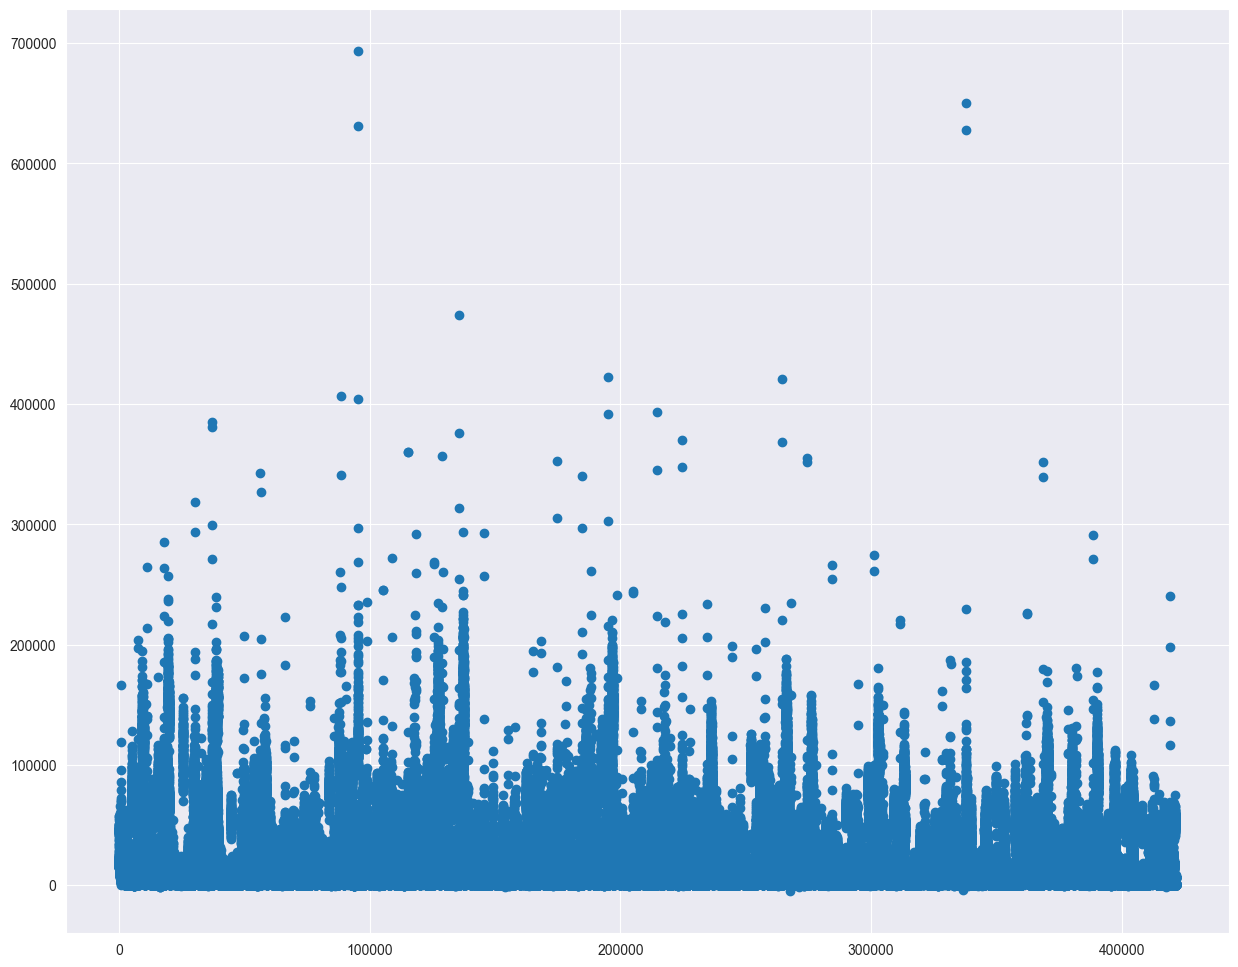

In [107]:
# outliers above 25k
ax, fig = plt.subplots(figsize=(15, 12))
plt.scatter(range(len(df)), df["Weekly_Sales"])

In [108]:
# scale data between 0, 1
df = df[(df["Weekly_Sales"] <= 30000) & (df["Weekly_Sales"] > 5000)]

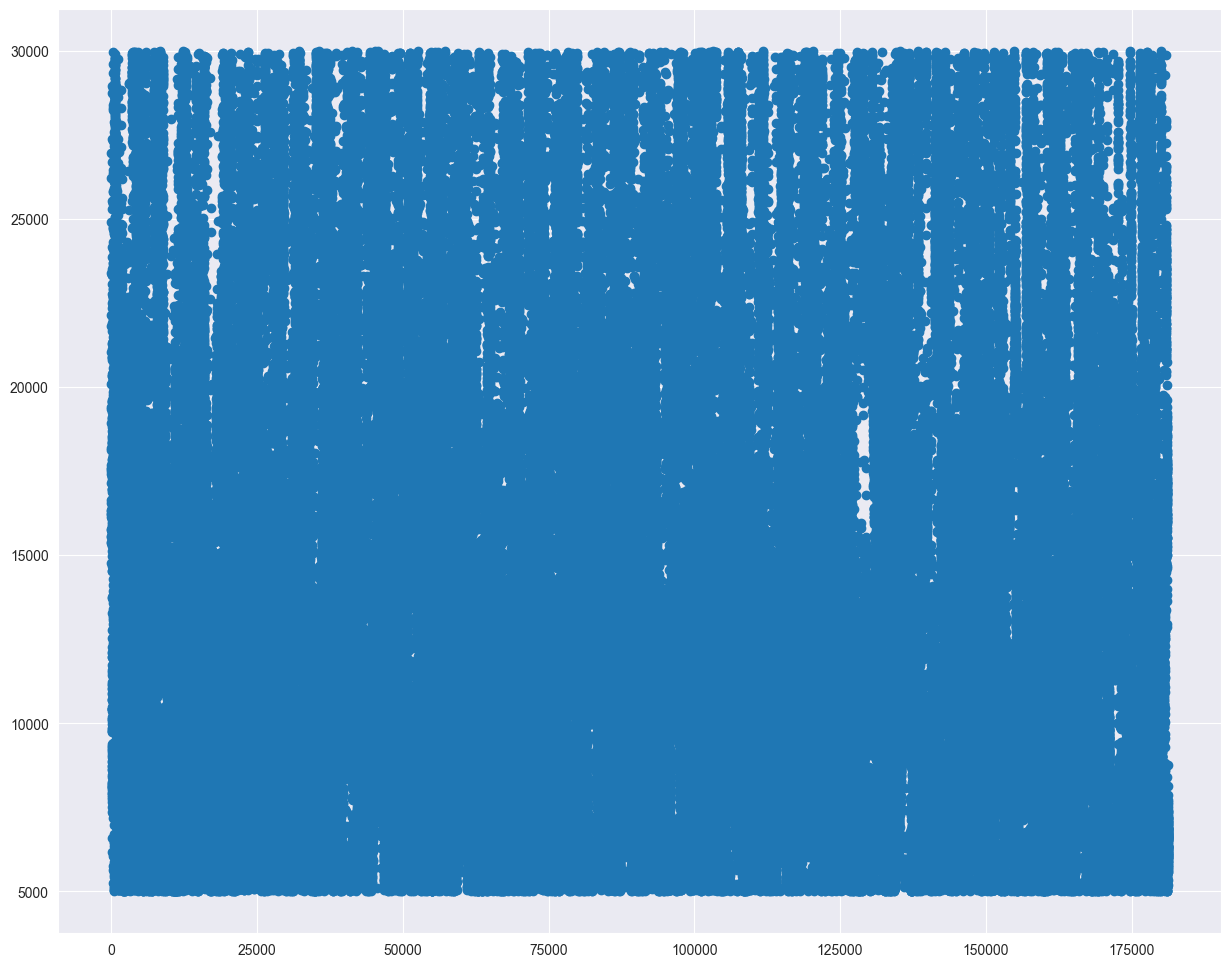

In [109]:
# outliers above 25k
ax, fig = plt.subplots(figsize=(15, 12))
plt.scatter(range(len(df)), df["Weekly_Sales"])

<Axes: ylabel='Weekly_Sales'>

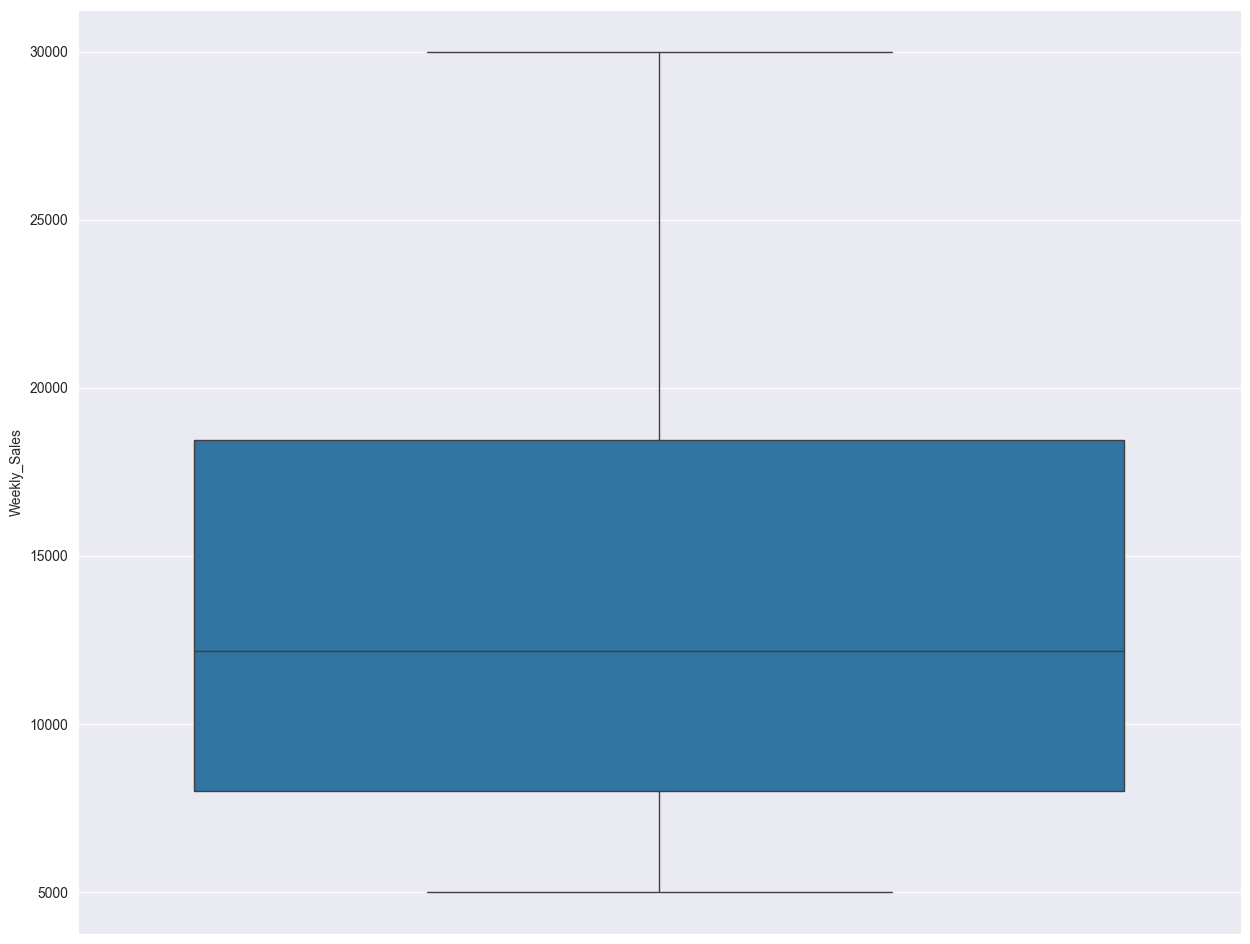

In [110]:
# looks much better
ax, fig = plt.subplots(figsize=(15, 12))
sns.boxplot(data=df["Weekly_Sales"],)

In [111]:
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler(feature_range=(-1, 1))#StandardScaler(with_mean=True, with_std=True) 
df["Weekly_Sales_Scaled"] = df["Weekly_Sales"].map(lambda x: np.log(x) if x != 0 else np.log(1))
#df["Weekly_Sales_Scaled"] = scaler.fit_transform(df["Weekly_Sales"].values.reshape(-1,1))

<Axes: ylabel='Frequency'>

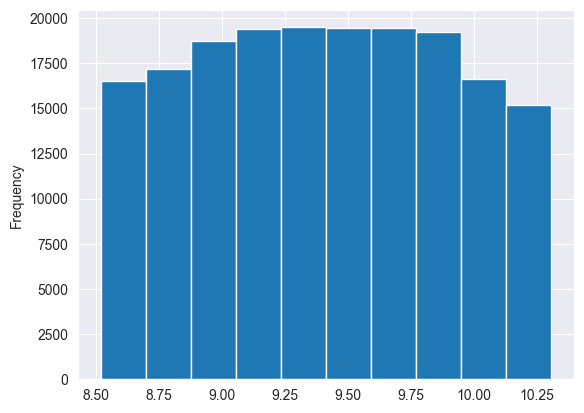

In [112]:
df["Weekly_Sales_Scaled"].plot(kind="hist")

In [113]:
# split data into two sets. One where fuel prices are higher and one where fuel prices are lower. A good cutoff could be ~3.15 
low_df = df[df["Fuel_Price"] <= 3.15] 
high_df = df[df["Fuel_Price"] > 3.15]

In [114]:
len(low_df) + len(high_df)

181276

In [115]:
len(df)

181276

<Axes: ylabel='Weekly_Sales_Scaled'>

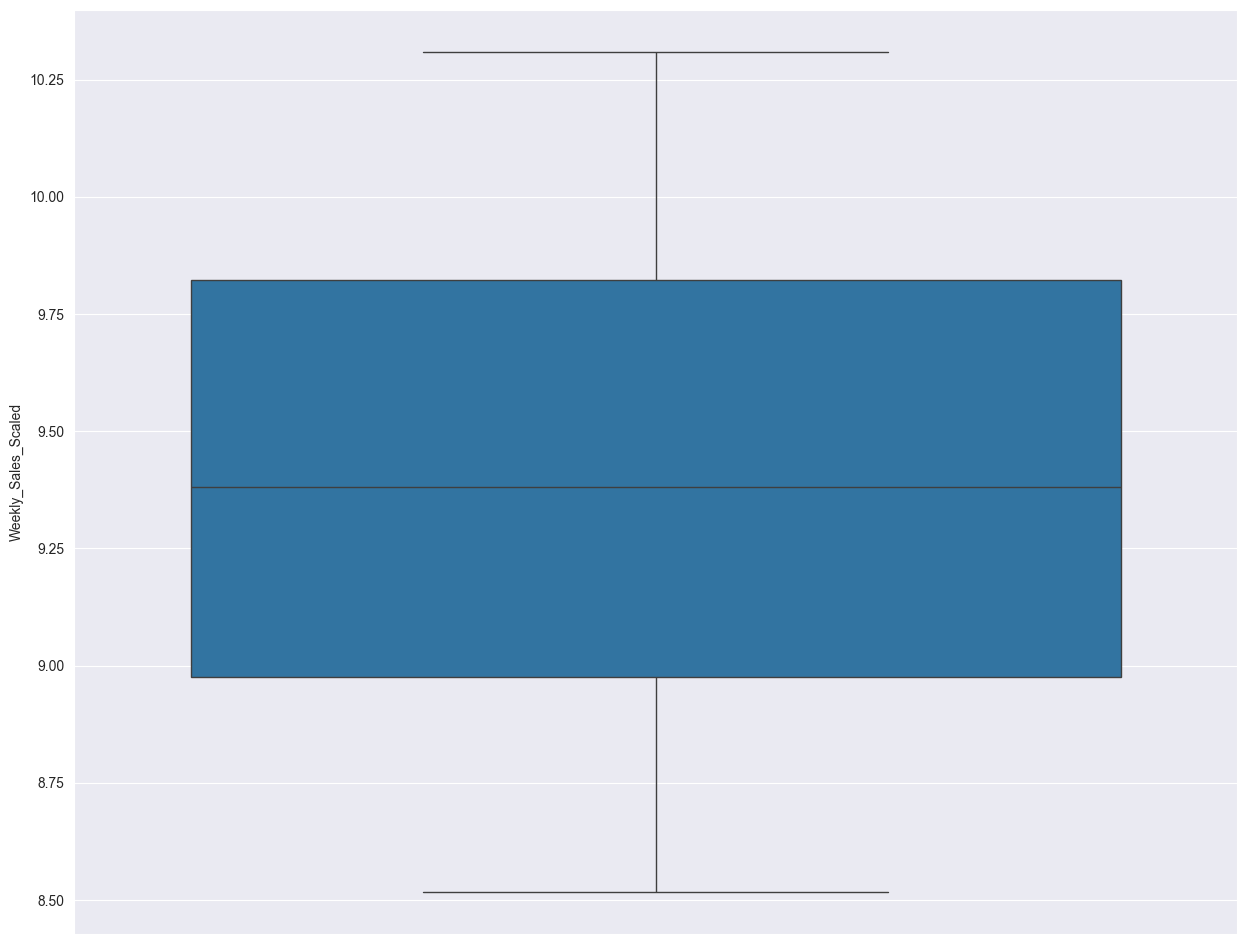

In [126]:
ax, fig = plt.subplots(figsize=(15, 12))
sns.boxplot(data=low_df["Weekly_Sales_Scaled"],)

<Axes: ylabel='Weekly_Sales'>

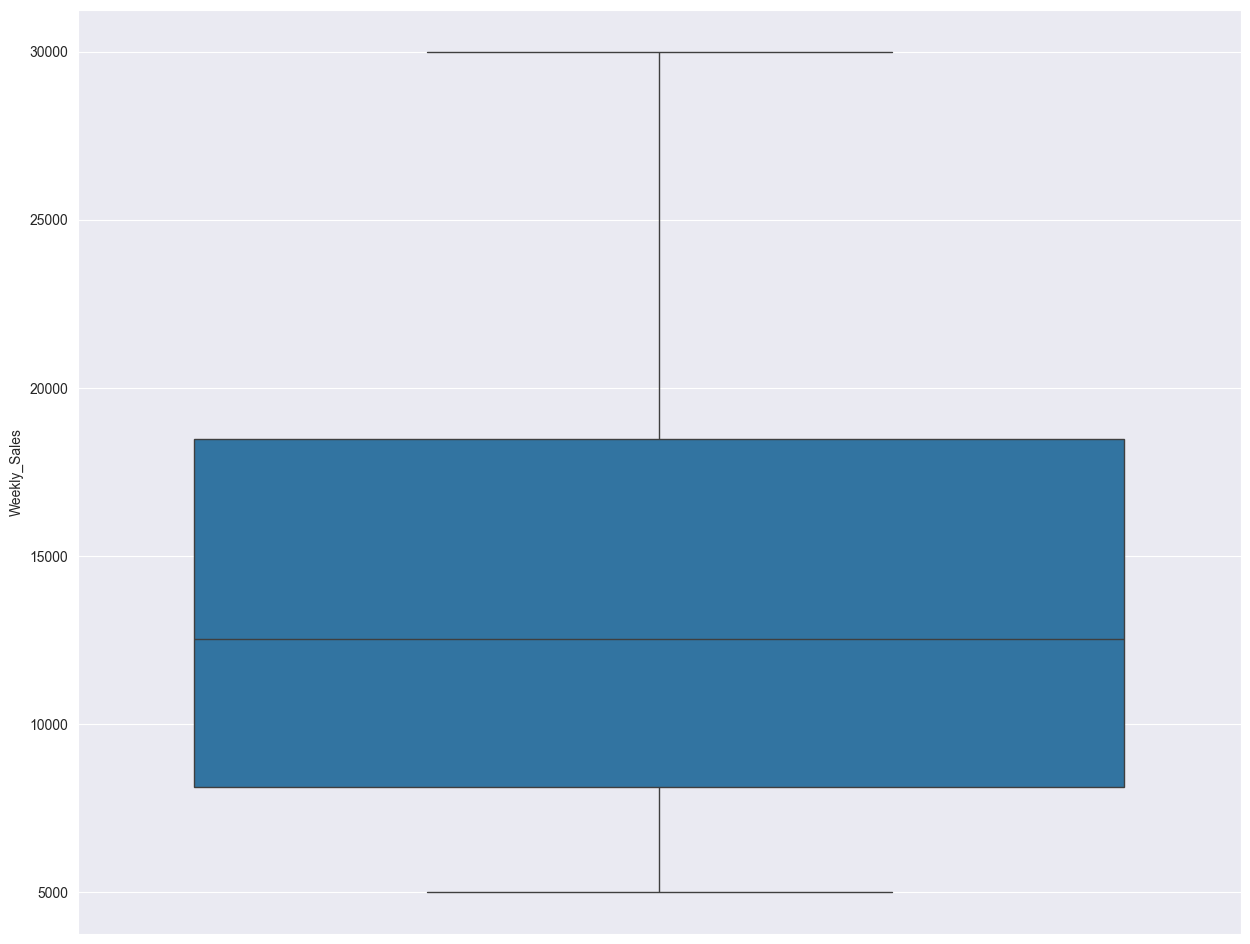

In [127]:
ax, fig = plt.subplots(figsize=(15, 12))
sns.boxplot(data=high_df["Weekly_Sales"])

In [118]:
res = stats.ttest_ind(low_df["Weekly_Sales_Scaled"], high_df["Weekly_Sales_Scaled"], equal_var=False)

In [119]:
res

TtestResult(statistic=np.float64(0.611351452778732), pvalue=np.float64(0.5409679096071707), df=np.float64(142553.6602752981))

# Hypotheses
## h0 : There are no differences in the population u_low_unemployment and u_high_unemployment. 
## h1: There is a differences in the population u_low_unemployment and u_high_unemployment. 
p = .05 


In [121]:
# split data into two sets. One where fuel prices are higher and one where fuel prices are lower. A good cutoff could be ~3.15 
low_df = df[df["Unemployment"] <= 8.0] 
high_df = df[df["Unemployment"] > 8.0]

In [122]:
len(high_df)

85013

In [123]:
len(low_df)

96263

In [124]:
res = stats.ttest_ind(low_df["Weekly_Sales_Scaled"], high_df["Weekly_Sales_Scaled"], equal_var=False)

In [125]:
res

TtestResult(statistic=np.float64(-9.13641514241759), pvalue=np.float64(6.520321790792963e-20), df=np.float64(178961.6184419047))